In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Load Raw Data

In [4]:
data_path = "C:/Users/Lenovo/Downloads/ml-1m/"  

ratings = pd.read_csv(
    data_path + "ratings.dat",
    sep="::",
    header=None,
    engine="python",
    names=["user_id", "movie_id", "rating", "timestamp"],
    encoding="latin-1"
)

movies = pd.read_csv(
    data_path + "movies.dat",
    sep="::",
    header=None,
    engine="python",
    names=["movie_id", "title", "genres"],
    encoding="latin-1"
)

users = pd.read_csv(
    data_path + "users.dat",
    sep="::",
    header=None,
    engine="python",
    names=["user_id", "gender", "age", "occupation", "zip"],
    encoding="latin-1"
)

print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)
print("Users shape:", users.shape)

Ratings shape: (1000209, 4)
Movies shape: (3883, 3)
Users shape: (6040, 5)


In [8]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Dataset Overview and Statistics

In [12]:
print(f"Number of unique users: {ratings['user_id'].nunique()}")
print(f"Number of unique movies: {ratings['movie_id'].nunique()}")
print(f"Total ratings: {len(ratings)}")
print(f"Sparsity: {1 - len(ratings) / (ratings['user_id'].nunique() * ratings['movie_id'].nunique()):.6f}")

Number of unique users: 6040
Number of unique movies: 3706
Total ratings: 1000209
Sparsity: 0.955316


### Ratings per User

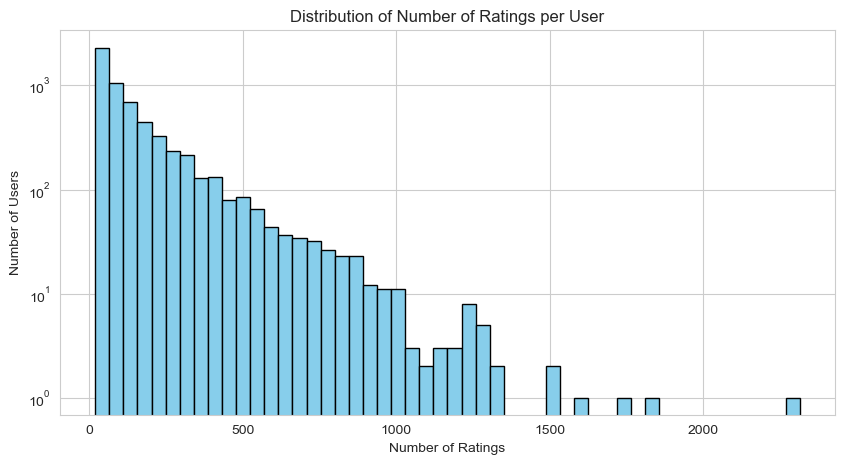

Average ratings per user: 165.60
Median ratings per user: 96.00


In [13]:
ratings_per_user = ratings.groupby("user_id")["rating"].count()

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_user, bins=50, edgecolor="black", color="skyblue")
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.yscale("log")
plt.show()

print(f"Average ratings per user: {ratings_per_user.mean():.2f}")
print(f"Median ratings per user: {ratings_per_user.median():.2f}")

### Ratings per Movie

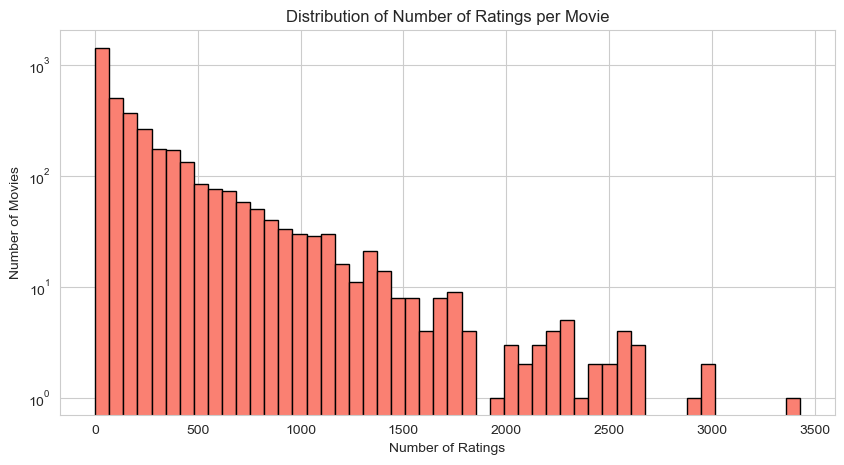

Average ratings per movie: 269.89
Median ratings per movie: 123.50


In [14]:
ratings_per_movie = ratings.groupby("movie_id")["rating"].count()

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_movie, bins=50, edgecolor="black", color="salmon")
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.yscale("log")
plt.show()

print(f"Average ratings per movie: {ratings_per_movie.mean():.2f}")
print(f"Median ratings per movie: {ratings_per_movie.median():.2f}")

### Top 10 Most Rated Movies

In [15]:
top_movies = ratings_per_movie.sort_values(ascending=False).head(10)
top_movies_info = movies[movies["movie_id"].isin(top_movies.index)].set_index("movie_id").loc[top_movies.index]

top_movies_info["num_ratings"] = top_movies.values
top_movies_info[["title", "genres", "num_ratings"]]

,title,genres,num_ratings
movie_id,,,
2858,American Beauty (1999),Comedy|Drama,3428
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,2991
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,2990
1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,2883
480,Jurassic Park (1993),Action|Adventure|Sci-Fi,2672
2028,Saving Private Ryan (1998),Action|Drama|War,2653
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,2649
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2590
1270,Back to the Future (1985),Comedy|Sci-Fi,2583


### `Genre Analysis

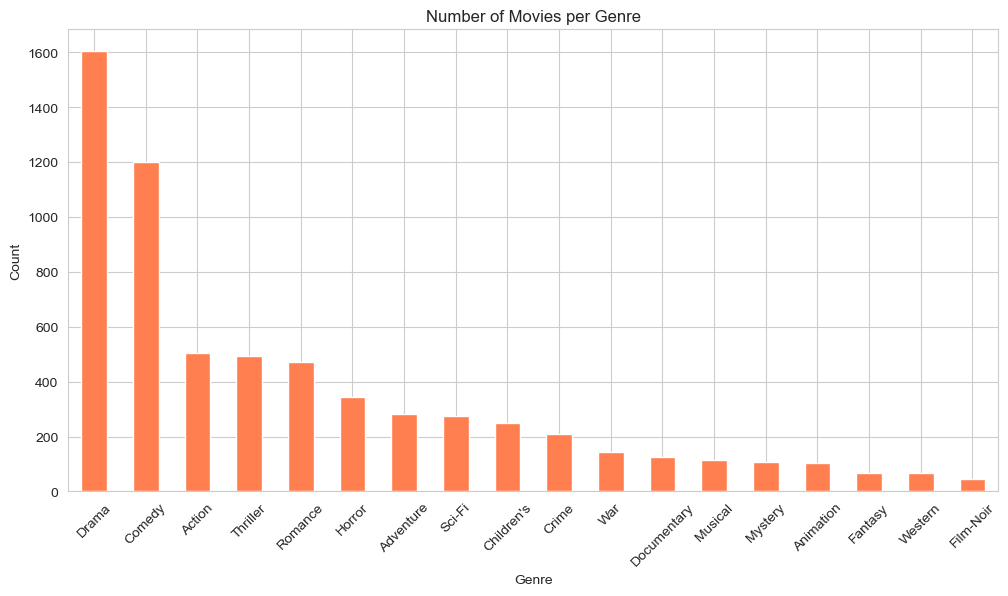

In [16]:
# Explode genres for counting
movies["genres_list"] = movies["genres"].str.split("|")
all_genres = [genre for sublist in movies["genres_list"] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar", color="coral")
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Save Processed Data for Later Phases

In [17]:
ratings.to_csv("D:/Machine Learning Projects/10. Movie Recommender/ratings_processed.csv", index=False)
movies.to_csv("D:/Machine Learning Projects/10. Movie Recommender/movies_processed.csv", index=False)
users.to_csv("D:/Machine Learning Projects/10. Movie Recommender/users_processed.csv", index=False)